## Chapter 4: [Spectroscopy](CH4-Spectroscopy.ipynb)

<hr style="height:1px;border-top:4px solid #FF8200" />

# Analysis of Spectrum Images - Core-Loss


part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes



## Content

Plotting, Interacting and Quantifying Spectrum Image data

Please cite for core-loss quantification:

[M. Tian et  al. *Measuring the areal density of nanomaterials by electron energy-loss spectroscopy*
Ultramicroscopy Volume 196, 2019, pages 154-160](https://doi.org/10.1016/j.ultramic.2018.10.009)

as a reference of this quantification method.

## First we import the relevant packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook
%gui qt

from scipy.ndimage.filters import gaussian_filter

# import pyTEMlib packages
import pyTEMlib
import pyTEMlib.file_tools  as ft     # File input/ output library
import pyTEMlib.EELS_tools  as eels 

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ',pyTEMlib.__version__)

Populating the interactive namespace from numpy and matplotlib
windows
pyTEM version:  0.11.2019.3


# Load and plot a spectrum

As an example we load the spectrum **1EELS Acquire (high-loss).dm3** from the *example data* folder.

Please see [Working with Spectrum Images](CH4-Working_with_Spectrum_Images.ipynb) for details on storage and plotting.

Channel_000 :  5-EELS Spectrum Image (high-loss)
Channel_001 : 


Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


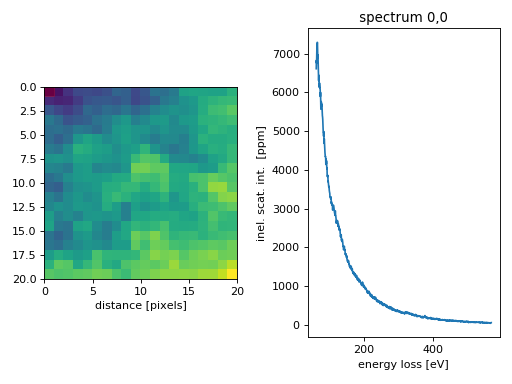

In [3]:
# If a file is open, close it
try:
    h5_file.close()
except:
    pass
# Load new file
h5_file = ft.h5open_file()#os.path.join(current_directory,filename))
current_channel = h5_file['Measurement_000/Channel_000']
measurement_group = h5_file['Measurement_000']


for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')    
        
if current_channel['data_type'][()] == 'spectrum_image':
    SI_plot= eels.interactive_spectrum_image(current_channel, horizontal = True)
    
else:
    print('NOT what we want here, please select a spectrum image ')
    ft.h5_plot(current_channel)
   
    

## Add survey image to file
If you have not done so before, add the survey image to the dataset (measurement group).

In [5]:
del measurement_group['Channel_001']

In [3]:
SI_channel = ft.h5add_channels(h5_file,current_channel,'survey image')
    
measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ')   
        

File Selection canceled
Channel_000 :  5-EELS Spectrum Image (high-loss)


## Add Z-contrast image
If you have not done so before, add the survey image to the dataset (measurement group).

RuntimeError: Unable to create link (name already exists)

In [8]:
Z_channel = ft.h5_add_channel(h5_file,current_channel,'Z-contrast image')


ft.current_channel.create_dataset('title','Z-contrast image')

measurement_group = h5_file[current_channel.name.split('/')[1]]
    
for key in list(measurement_group.keys()):
    if 'title' in measurement_group[key].keys(): 
        print(key,': ',measurement_group[key]['title'][()])
    else:
        print(key,': ') 

AttributeError: module 'pyTEMlib.file_tools' has no attribute 'current_channel'

## Add Survey Image to plot above



In [3]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_data() 

## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


## Overlay Z-contrast image on survey image at plot above

In [4]:
SI_plot.set_Survey_image(h5_file['Measurement_000']['Channel_001'])
SI_plot.overlay_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])


## set view port 
#SI_plot.ax1.set_xlim(0,90)
#SI_plot.ax1.set_ylim(60,20)


KeyError: "Unable to open object (object 'title' doesn't exist)"

In [9]:
SI_plot.set_Zcontrast_image(h5_file['Measurement_000']['Channel_002'])

In [ ]:
#energy_scale = np.linspace(0,1023,1024)* 0.454 + tags['spectral_origin_x']-7

print(tags.keys())

## Prepare Quantification

Box(children=(ToggleButton(value=False, description='fix_energy'), ToggleButton(value=False, description='fit_…

<IPython.core.display.Javascript object>


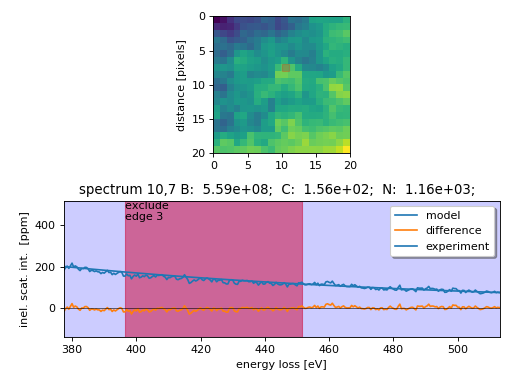

In [13]:
tags = SI_plot.tags.copy()
SI_plot2= eels.interactive_spectrum_image(tags, horizontal = False)

# Set edges to be fitted
edges_present = ['B-K1', 'C-K1', 'N-K1']
SI_plot2.tags['edges_present'] = edges_present

## ACTIVATE THE FITTING
#SI_plot.analysis= 'fit_quantification'
#SI_plot2.set_legend(False)    

## Activate the regions selection tool.

In [14]:
## define the fitting regions
edges = eels.make_edges(edges_present, tags['energy_scale'], tags['acceleration_voltage'], tags['collection_angle'])

regions = eels.Region_Selector(SI_plot2.ax2)
for key in edges:
    regions.set_regions(str(key),edges[key]['onset']-edges[key]['start_exclude'], edges[key]['start_exclude']+edges[key]['end_exclude'])                               
regions.set_regions('fit region',tags['energy_scale'][100], tags['energy_scale'][-1]-tags['energy_scale'][100])


## After adjusting the regions, remove the selector and make legend visible

In [15]:
SI_plot2.set_legend(True)
region_tags = regions.get_regions()
SI_plot2.tags['region_tags'] = region_tags
tags2 = SI_plot2.tags.copy()
try:
    regions.disconnect()
    del regions
except:
    pass

## You can  adjust the previous selections 

In [16]:
try:
    region_tags = regions.get_regions()
    regions.disconnect()
    del regions
except:
    pass

regions = eels.Region_Selector(SI_plot2.ax2)
print(region_tags['1'].keys())
for key in region_tags:
    regions.set_regions(str(key),region_tags[key]['start_x'], region_tags[key]['width_x'])                               


dict_keys(['start_x', 'width_x'])


The result of the selected spectrum can be seen here

In [19]:
print(SI_plot2.tags['spectra'][f'{x}-{y}'].keys())

dict_keys(['spectrum', 'energy_scale', 'intensity_scale'])


In [11]:
x = SI_plot2.x
y = SI_plot2.y
print('spectrum ', x,y)
spectrum_dictionary = SI_plot2.tags['spectra'][f'{x}-{y}']['edges']
for key in  spectrum_dictionary: 
    if key.isdigit():  # only edges have numbers in that dictionary
        
        element = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        areal_density = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['areal_density']
        print(f'{element:2}: {areal_density:.3e} counts')

spectrum  0 0


KeyError: 'edges'

## Whole Spectrum Image Analysis

Now we do the all the spectra, with the same setting as selected above. 
Set the verbose variable to **True** to see the progress.

In [9]:
SI_plot2.do_All(verbose = False)

## Plotting the results:

The results are in the individual spectrum dictionary: 

*SI_plot2.tags['spectra'][f'{x}-{y}']*

The compositional results are in the edge dictionary. Each edge has its own sub-dictionary. The areal_density is the result of the compositional fit. 

So we collect the areal densities of the different edges in numpy arrays.

The arrays are stored in a dictionary *results_dictionary* and then we plot those arrays.



In [10]:
results_dictionary = {}

# we are only after the edges so it does not matter which spectrum we use
for key in  SI_plot2.tags['spectra']['0-0']['edges']: 
    
    if key.isdigit():  # only edges have numbers in that dictionary
        results_dictionary[key] = {} # make new dictionary
        # store the additional data like element and what edge
        results_dictionary[key]['element'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['element']
        results_dictionary[key]['Z'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['Z']
        results_dictionary[key]['onset'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['onset']
        results_dictionary[key]['symmetry'] =SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['symmetry']
        
        # intitalize data array
        results_dictionary[key]['data'] = np.empty(SI_plot.tags['cube'].shape[0:2])
        # go through all spectra and fill data array pixel.
        for x in range(results_dictionary[key]['data'].shape[0]):
            for y in range(results_dictionary[key]['data'].shape[1]):
                results_dictionary[key]['data'][x,y] = SI_plot2.tags['spectra'][f'{x}-{y}']['edges'][key]['areal_density']

## plot
ax = []; im= [];color_bar = []
fig = plt.figure()
titles = ['Ti [counts]', 'V [counts]', 'O [counts]', 'O/(Ti+V)  [rel.]',]
for key in results_dictionary:        
    ax.append(plt.subplot(2, 2, int(key)))
    im.append(ax[-1].imshow(results_dictionary[key]['data'].T, origin= 'upper'));
    color_bar.append(fig.colorbar(im[-1], ax=ax[-1]))
    color_bar[-1].set_label(results_dictionary[key]['element']+' [counts]')
#im[3].set_clim(vmax=8)

KeyError: 'edges'

## Dictionary for Log of Fitting Results: Needs to be finished

In [11]:
out_tags = {}
for key1 in edges:
    if key1.isdigit():
        for key2 in edges[key1]:
            out_tags[f"edge_{key1}_{key2}"] = edges[key1][key2]
    else:
        for key2 in edges[key1]:
            out_tags[f"{key1}_{key2}"] = edges[key1][key2]

out_tags['monolayer']= 18.2 #atoms/nm^2
out_tags['X_section_unit'] = 'atoms/nm$^2$'

In [12]:
print(out_tags.keys())

dict_keys(['edge_1_Z', 'edge_1_symmetry', 'edge_1_element', 'edge_1_chemcial_shift', 'edge_1_original_onset', 'edge_1_onset', 'edge_1_start_exclude', 'edge_1_end_exclude', 'edge_1_data', 'edge_2_Z', 'edge_2_symmetry', 'edge_2_element', 'edge_2_chemcial_shift', 'edge_2_original_onset', 'edge_2_onset', 'edge_2_start_exclude', 'edge_2_end_exclude', 'edge_2_data', 'edge_3_Z', 'edge_3_symmetry', 'edge_3_element', 'edge_3_chemcial_shift', 'edge_3_original_onset', 'edge_3_onset', 'edge_3_start_exclude', 'edge_3_end_exclude', 'edge_3_data', 'edge_4_Z', 'edge_4_symmetry', 'edge_4_element', 'edge_4_chemcial_shift', 'edge_4_original_onset', 'edge_4_onset', 'edge_4_start_exclude', 'edge_4_end_exclude', 'edge_4_data', 'monolayer', 'X_section_unit'])


## Log Results

In [13]:
log_group = ft.h5_add_Log(current_channel, name='Xsection_fit')
ft.h5_add_Data2Log(log_group,  out_tags)

## Check on File Content

In [14]:
import pyUSID as usid 
usid.hdf_utils.print_tree(h5_file)


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Log_000
      -------
      ├ X_section_unit
      ├ _Xsection_fit
      ├ edge_1_Z
      ├ edge_1_areal_density
      ├ edge_1_chemcial_shift
      ├ edge_1_data
      ├ edge_1_element
      ├ edge_1_end_exclude
      ├ edge_1_onset
      ├ edge_1_original_onset
      ├ edge_1_start_exclude
      ├ edge_1_symmetry
      ├ edge_2_Z
      ├ edge_2_areal_density
      ├ edge_2_chemcial_shift
      ├ edge_2_data
      ├ edge_2_element
      ├ edge_2_end_exclude
      ├ edge_2_onset
      ├ edge_2_original_onset
      ├ edge_2_start_exclude
      ├ edge_2_symmetry
      ├ model_background
      ├ model_background-A
      ├ model_background-poly_1
      ├ model_background-poly_2
      ├ model_background-r
      ├ model_blurred
      ├ model_fit_area_end
      ├ model_fit_area_start
      ├ model_fit_parameter
      ├ model_mask
      ├ model_spectrum
      ├ monolayer
      ├ time_stamp
      ├ title
    ├ Position_

# Close File
File needs to be closed to be used with other notebooks

In [15]:
h5_file.close()

## Back: [Calculating Dielectric Function II: Silicon](DielectricDFT2.ipynb)
## Next:  [ELNES](ELNES.ipynb)

## Chapter 4: [Spectroscopy](Spectroscopy.ipynb)
## Index: [Index](Analysis_of_Transmission_Electron_Microscope_Data.ipynb)